In [2]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Title: Image Classification API Server Performance Analysis

## Introduction:

In this report, we analyze the performance of an image classification API server under different scenarios. We tested five different scenarios using the Locust load testing tool with Docker instances. The hardware specifications of the server remained constant except for the last scenario, where we increased the RAM to 7 GB. The primary goal is to compare the obtained results based on the number of users being simulated and the instances deployed.

## Hardware Specifications:
The server used for all scenarios had the following hardware specifications:

- CPU: 4 cores
- RAM: 2 GB (except for the last scenario, which had 7 GB)
- Docker instances: 1 or 3 instances




### Scenario 1: 1 Docker Instance, 200 Users:
In this scenario, we simulated 200 users utilizing a single Docker instance with 2 GB of RAM. The server performance was evaluated under this load.

### Scenario 2: 1 Docker Instance, 1000 Users:
In this scenario, we increased the user load to 1000 users while maintaining a single Docker instance with 2 GB of RAM.

### Scenario 3: 3 Docker Instances, 200 Users:
This scenario involved deploying three Docker instances, each with 2 GB of RAM, and simulating 200 users.

### Scenario 4: 3 Docker Instances, 1000 Users:
Similar to Scenario 3, three Docker instances were used, but the user load was increased to 1000 users.

### Scenario 5: 3 Docker Instances, 7 GB RAM, 200 Users:
In this final scenario, the RAM was increased to 7 GB while maintaining three Docker instances. The user load was set to 200.


In [69]:
df1 = pd.read_csv('18.csv')
df2 = pd.read_csv('19.csv') 
df3 = pd.read_csv('22.csv')
df4 = pd.read_csv('23.csv') 
df5 = pd.read_csv('24.csv') 

df1 = df1[['Requests/s', 'Average Response Time', 'Max Response Time']].loc[3]
df2 = df2[['Requests/s', 'Average Response Time', 'Max Response Time']].loc[3]
df3 = df3[['Requests/s', 'Average Response Time', 'Max Response Time']].loc[3]
df4 = df4[['Requests/s', 'Average Response Time', 'Max Response Time']].loc[3]
df5 = df5[['Requests/s', 'Average Response Time', 'Max Response Time']].loc[3]

In [70]:
frames = [df1, df2, df3, df4, df5]

df = pd.concat(frames, axis=1)
df.columns = ["Scenario 1", "Scenario 2", "Scenario 3", "Scenario 4", "Scenario 5"]
df = df.T

In [77]:
df.reset_index(inplace=True)

In [118]:
df.rename(columns={'index': 'Scenario'}, inplace=True)

Text(0.5, 1.0, 'Max Response Time')

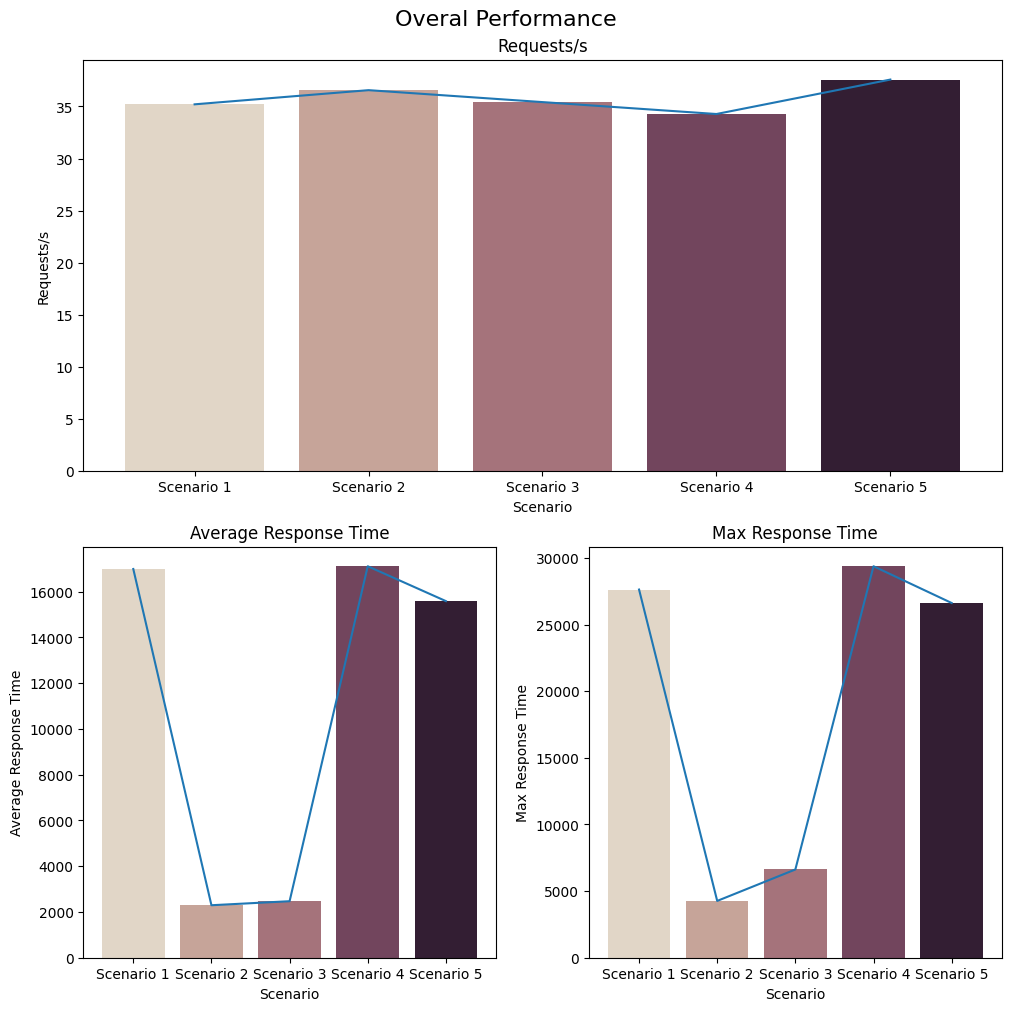

In [124]:
from matplotlib import axes
from seaborn import kdeplot

fig, axs = plt.subplot_mosaic(mosaic="""AA;BC""", constrained_layout=True,figsize=(10, 10))
fig.suptitle('Overal Performance', fontsize=16)

axa = sns.barplot(data=df, x="Scenario", y="Requests/s", palette="ch:.25" , ax=axs['A'])
sns.lineplot(x=np.arange(0,len(df)), y=df['Requests/s'], ax=axa)
axs['A'].set_title('Requests/s')

axb = sns.barplot(data=df, x="Scenario", y="Average Response Time", palette="ch:.25" , ax=axs['B'])
axs['B'].set_title('Average Response Time')
sns.lineplot(x=np.arange(0,len(df)), y=df['Average Response Time'], ax=axb)

axc = sns.barplot(data=df, x="Scenario", y="Max Response Time", palette="ch:.25" , ax=axs['C'])
sns.lineplot(x=np.arange(0,len(df)), y=df['Max Response Time'], ax=axc)
axs['C'].set_title('Max Response Time')

## Conclusion:
Based on the performed simulations, it is evident that increasing the number of Docker instances did not help to distribute the load and  did not improved the overall response time, mainly due to a bottleneck in computing power and processor performance that was not related to the available RAM. However, the limited RAM in the earlier scenarios resulted in increased response times and reduced throughput as the user load increased. By increasing the RAM to 7 GB, we there was no improvement in response time and throughput, even with a moderate user load. However, further system architecture optimization should be performed using Kubernetes and load distributors.

It is important to consider hardware specifications, especially RAM, CPU, when deploying an image classification API server. The ideal configuration may vary depending on the expected user load and the complexity of the classification algorithm. Regular load testing and performance analysis are crucial for optimizing server performance and ensuring a smooth user experience.